# Yelp Review Analysis for Mexican Restaurant

Author: Ruixuan Zhao, Zhao Li, Jiahan Li, Runfeng Yong

## 1. Intorduction
This is a course project to analysis Yelp data. Yelp is an Internet company to "help people find great local businesses" by providing a platform for users to write review of businesses. As users of Yelp APP, we have realized the convenience of using it to find delicious food or great service. Moreover, in order to make better use of the data in Yelp, we hope to get some advice to the business owners through data analysis, which will help improve the quality of the businesses.

Because there are various kinds of businesses in Yelp APP, in order to provide more specific advice, we just choose one type of businesses: Mexican Restaurant. The reason why we choose them is that Mexican food is one of the popular foods in USA and Canada, we can get a large enough dataset to do analysis and finally get useful results.

In our data analysis, we do text processing and exploratory data analysis (word cloud, Mexican food popularity heatmap and etc). Furthermore, we use linear regression model to give advice about attributes and random forest to select important reviews.
 


### 1.1 Background Information
Our data come from https://uwmadison.box.com/s/bp36qfdw9twqf6po4tft6iktdfpzr0k0. The data contain four json files: business.json, review.json,tip.json, user.json.  

Because our goal is to provide advice for Mexican restaurant, we select the data which come from Mexican restaurant, and organize into several csv files: mexican_review.csv, mexican_tip.csv, mexican_info.csv. These csv files contains 4,618 Mexican restaurants, 401,692 reviews of mexican restaurants and 80,720 tips of mexican restaurants.

#### 1.1.1 Review Data (mexican_review.csv)

In [0]:
review_word = pd.read_csv("Yelp_Review/mexican_review_p.csv")
review_word.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,2015-04-01 16:30:00,love chinese food love mexican food go wrong c...,1,7,1
1,S337tATeouQJdoPYyir29w,2mxBNBeFrgDszqGS5tdEHA,d_L-rfS1vT3JMzgCUGtiow,5.0,2016-07-25 03:57:19,pick meat planet chef make mexican style dish ...,0,0,0
2,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,2018-05-28 20:56:05,party 3 order fish tacos pork belly banh mi co...,1,0,1
3,CvJy7CdHJqsZNq22fUF7hA,DAssyKNnYBenf0s1uP5iRw,dInxwF8kXVdfLEGTIBRrSw,2.0,2017-04-30 04:13:18,employees busy chat one employee head drive th...,0,1,0
4,a6N51Ov3NEchmqsquNGtMA,qpYllTutvfoKvT5OEl7gGQ,HkbNItNrnXlNo59M0YyoMg,5.0,2016-09-30 19:51:43,come loco mill since open love come especially...,0,0,0


#### 1.1.2 Business Data (mexican_info.csv)

In [0]:
info = pd.read_csv("Yelp_Review/mexican_info.csv")
info.head()

,business_id,name,city,latitude,longitude,star,review_count
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,33.495194,-112.028588,3.0,18
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,36.195615,-115.040529,4.5,184
2,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,Toronto,43.666181,-79.316468,3.5,43
3,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,Chandler,33.261325,-111.790815,4.0,84
4,jScBTQtdAt-8RshaiBEHgw,Served,Henderson,36.010745,-115.064803,4.5,664


### 1.2 Our Goal
The overall goal of this project is to provide useful, analytical insights to business owners on Yelp, and build a shiny APP to visualize our analysis and make it easy to understand by business owners. Furthermore, we focus on following specific targets:

(1) We aim to find crucial reviews that matters to business owners.

(2) We aim to provide advice for business owners in following aspects: a. Type and taste of foods and drinks; b. service; c. Location; d. price; e. attributes.

(3) We aim to to present a restaurant’s rating over time in each city, so the business can tailor the business strategy for different seasons from the change in ratings.


## 2. Text Processing

In text processing, we do the following steps:
- Replace all upper case with lower case.
- Remove all characters except 0-9, a-z
- Tokenization, which turns texts into vectors of words.
- Remove stop words.
    - Example: I, me, my, you’re, it’s, what, haven’t, wouldn’t, just, very, too, during, etc.
- Lemmatization, which restore words to their original form.
    - Example: restaurants/restaurant, stripping/strip, seated/seat, took/take, etc.

## 3. Exploratory Data Analysis

### 3.1 Mexican Food Popularity

When roughly seeing through reviews, we find that mexican food has different popularity in different city. In order to verify our assumption, we define a popularity score:
\begin{align}
Popularity \; Score = \frac{\# \; Mexican \; Reviews}{\# \;All \; Reviews}
\end{align}

Then we plot the popularity and their relative average stars of the top 10 most and least popular cities:

![](Image/Notebook/popularity.png)

From the plot it is obvious that popularity differs a lot in different cities. The average stars of Mexican restaruants in cities where mexican food is hot are also a little higher in general. Because different place have different popularity of Mexican food, it is natural for us to think that preference of different Mexican food differs. This motivates us to analysis reviews by cities.

### 3.1 Local Rating Trend
It is easy for business owner to know and track the rating of his resturant but it is difficult for him to have a holistic view.

So in our data analysis, we want to not only give the business owner the suggestions but also enable him to know his business performance in a comprehensive way. In this regard, we plot the restaurant's local ranking of against the period. Then the owners can make adjustments accordingly.

Firstly, we pick the center dates we will measure at in every 60 days interval then caculate the average rating in the plus and minus 40 days range for every business in the city. Then at each center date we caculate the percentile score for each restaurant. In the plot we only show the period the restaurant is actually running. The reason to choose 80 days as the bandwidth is that it is not too narrow such that contain no reviews  nor too wide to lose too much local information and set the step length as 60 days is easier for us to notice seasonal effect if it exists.

The number below the points is the number of reviews used to calculate the average. And for some restaurant there exists periods where no review was given, in that case, we just connect the two nearest points with a red line. 

We can see the percentile score varies a lot at the beginning and become more stable after. It is because the reviews and restaurants are fewer at that time. The business owner can have a clearer understanding the position of his restaurant and if a shape rapid change is observed, he may learn something from the history.



In [0]:
from IPython.display import Image
Image(filename="./lose.png", width=800, height=300)

FileNotFoundError: ignored

### 3.2 The Relationship Between Keywords and Star Level in Different Cities
We draw some histograms to present the relationship between the frequency of keywords and star level indifferent cities. Let's take Phoenix for example.

### Positive/Negative words
In Section 3.2, we get some results from histograms. However, these results may not be accurate, because although some objects like one type of food appear in high rating reviews frequently, the most of customers are satisfied with everything except these objects. So, we should use another method to make our conclusion accurately. 

Then, we aim to find Top 5-8 frequency objects around positive words like “good” and negative words like “bad” (We just choose 10 words around objects to calculate.). We construct two proportions z-test to judge whether an object is positive or negative. We define: $p_1$ is the proportion of keywords of object around positive word; $p_2$ is the proportion of keywords of object around negative word. And, the hypothesis test is $H_0: p_1<p_2$. If p-value is smaller than 0.05, we might think that the object is positive; otherwise, we might think that the object is negative. Let’s see the example for Phoenix.

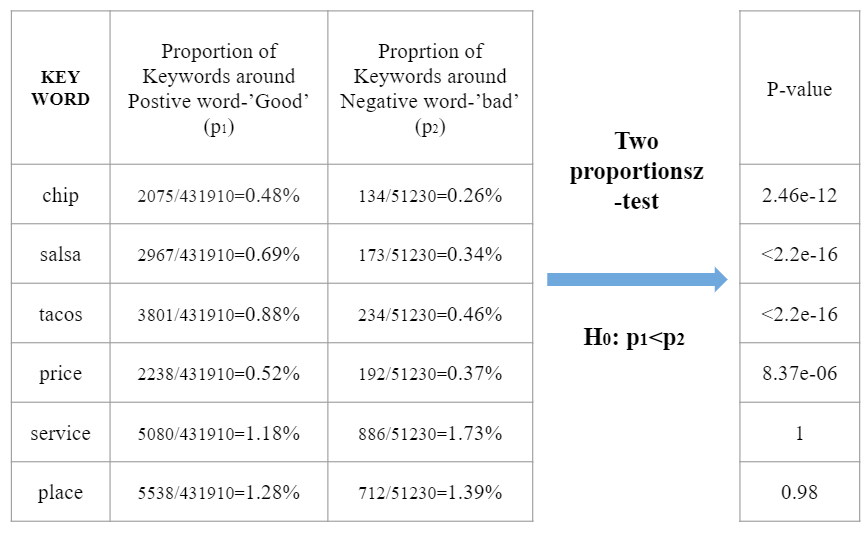

In [0]:
from IPython.display import Image
Image(filename="Yelp_Review/pos_neg.png", width=500, height=300)

**Recommendation for Mexican Restaurants in Pheonix：**
Congratulations! The Tacos, Chips and Salsa are really good. Also, customers are satisfied with the price. 
However, we recommend that you should improve your Service and change your business Location if possible.


### **3.3 Tests and Model for Attributes**
#### **3.3.1  Quick View of Attributes**

After spliting the attributes data, we have **21** **attributes** for all mexican restaurants. There are **233 missing values** out of **4618** restaurants, so there's no need for us to deal with the missing values specifically.

#### **3.3.2  Tests for Attributes**

By conducting two sample t-test for each attributes separately, for general data, we have the following 8 attributes significant:  
Caters, RestaurantsDelivery, DogsAllowed, RestaurantsTableService,  
 DriveThru, HappyHour, HasTV,
Wheelchair Accessible .  

#### **3.3.3  Linear Regression for Star & Attributes**

By using the 8 significant attributes as independent variables, star rating as dependent variable, we build a linear regression model, and the summary is as follows:  
![alt text](https://)
  
From the summary, we can see the coefficients of DriveThru, HappyHour are negative, to explain this, we think the service and foods from DriveThru and in HappyHour will be worse than usual, which devoted to negative effects on star ratings.

#### **3.3.4 Tests for Attributes in different Cities**

By doing t-tests in 10 Cities with most reviews:  
Las Vegas,Phoenix,Scottsdale,Toronto,Charlotte, Mesa,Henderson,Tempe,Pittsburgh,Chandler.  
  
So we have the following significant attributes table in 10 cities:  
![alt text](https://)



## Important Sentences for Business Owners

In order to find some specific advice for business owners, we thought it might be possible to directly extract sentences from user reviews containing the disadvantage of this business. 

If we can find some important sentences that greatly affacts the rating, then this sentence may contain some useful information for the business owner, such as the food is cold or the server is rude. In order to do so, we use Random Forest to train a calssification model so that we can get its feature importance, in this case, word importance if we transfer a text into a word vector where each column represents a word. 

We use 'WordVectorizer' to transfer texts into vectors. By this method, each column of the output vector represents a word and the value means how many times this word shows in this text. For example, it transfers the sentence 'I like buger. I also like salad.' in to vector as below:

| I | like | buger | salad | also |
|:-:|:----:|:-----:|:-----:|:----:|
| 2 | 2    | 1     | 1     | 1    |

Because we need disadvantages of a business, low star reviews are what we should mainly care about, so we mark 1-2 stars reviews as negative, 3 stars as neutral, 4-5 stars as positive, then fit the model with 3 classes. The classification performance is not bad. In model tunning part, we build the word vector vocabulary with 50000 randomly selected reivews from Phoenix in which 80% is for training and 20% is for testing. 

Because we only care about important sentences in reviews, we do not need a very extreme vocabulary size which contains every words in all reviews, we need words that are frequent in all reviews. Vocabulary size is the size of top words appear. A very large vocabulary size will also affect the performance of Randomly Forest as well because this tree will become very extreme with bad gereralization performance. In order to find a good balance, we tried some vocabulary size. We also limited max depth of trees. Some tesults are as below:

| Vocabulary Size | Tree Max Depth | Train Acc. | Test Acc. |
|:---------------:|:--------------:|:----------:|:---------:|
|       1000      |       50       |    95.5%   |   80.1%   |
|       5000      |       50       |    96.6%   |   79.5%   |
|       5000      |       100      |    98.5%   |   81.1%   |
|       5000      |       None     |    99.8%   |   80.6%   |
|       10000     |       100      |    97.9%   |   79.7%   |
|       20000     |       100      |    97.3%   |   78.5%   |

As the results shown, 5000 words and max depth 100 is a good choice, which keeps enough words and also have a good generalization performance at 81% test accuracy. 

Because in previous analysis we found there are some preference difference in different cities, we train the vocabulary differently in differnt cities. The vocabulary size is fixed to 5000 and for cities with more than 50000 reviews, we randomly select 50000 for training.

Once the tree is trained, we can get the feature importance directly. The feature importance is also a map between words and their importance. With this mapping relationship, we can find negative reviews with high scores. From these reviews, we can futher extract the most important sentence in it. 

Because high frequency words contains a lot of positive words like 'great', we manually modify the importance of these words as 0 to make sure we ignore very positive sentences. In order to punish long reviews, we compute the review score with 30 words with highest importance.  

In the dataset, there are also three columns 'useful', 'cool' and 'funny' that shows how popular are these reviews. We also count these values into consideration. The formula for Review Score is:
$$Review \; Score = Sum(Top \; 30 \; Word \; Importance) + 0.01\times \log(Useful+Cool+Funny)$$

After finding important negative reivews, we use the same trick to find important sentences in top 3 important reviews. The formula is:
$$Sentence \; Score = Sum(Top \; 6 \; Word \; Importance)$$

The log term in the Review Score is to punish too very high popularity of reviews among users. In this way, our Review Score combines both the importance of sentences in rating classification and its popularity among users. This is a good measure of reviews with respect to their value for business owners. Negative sentences with high value should give business owners details about how his restaurant is bad in user's eyes.

Below are some examples of important sentences program automatically extract from reviews in Phoenix:

|Restaurant|Important Sentence|
|:---------|:------------------|
|La Santisima|I asked the server what vegetables came with the vegetable chilaquiles but there seemed to be a language barrier.|
|Taco Guild|Eventually I got chips and then the folks next to us got food and we hadn't even been asked if we would like to place an order.|
|Chino Bandido|He was so rude, I at this point refused to give my money to such a disrespectful person.|
|Barrio Cafe|The burrito though, I had high hopes, the chicken looked like the stuff you can get at the store.|
|The Stand|Now the burgers (along with the milkshakes) are hit & miss depending on who is in the kitchen, they continuously mess up your order.|
|Rokerij|If people said, its a decent bar with good food, i would say: heck yes, 4 stars, just needs some better service.|

Because the sentences are extracted directly from reviews, some sentences are long, but these sentences do point out some thing bad for a restaurant such as server being rude, food being bland, etc. These sentences reminds business owners the reason for low stars and give them a brief sence about where to improve in detail.

## 5. Conclusion

## 6. Contribution

**Ruixuan Zhao** 

**Zhao Li** 

**Jiahan Li** 

**Runfeng Yong** 